In [2]:
import pandas as pd
import re
from unicodedata import normalize

In [3]:
medicamentos = pd.read_csv('medicamentos_limpo.csv', sep=',')

In [4]:
medicamentos.describe()

,registro,preco_final_consumidor
count,2.677500e+04,2.271900e+04
mean,1.225369e+12,2.102922e+03
std,2.593503e+11,3.193217e+04
min,5.760051e+10,1.770000e+00
25%,1.031100e+12,4.493000e+01
50%,1.097402e+12,1.070600e+02
75%,1.356906e+12,3.009200e+02
max,1.988300e+12,4.119027e+06


In [5]:
medicamentos.columns


Index(['ativo', 'CNPJ', 'laboratorio', 'registro', 'EAN 1', 'EAN 2', 'EAN 3',
       'produto', 'apresentacao', 'classe_terapeutica', 'tipo_produto',
       'regime_preco', 'restricao_hospitalar', 'comercializavel', 'tarja',
       'preco_final_consumidor'],
      dtype='object')

In [6]:
def remover_acentos(texto):
    if texto is None:
        return ''
    texto = str(texto)

    mapa = str.maketrans(
        "áàãâäÁÀÃÂÄ"
        "éèêëÉÈÊË"
        "íìîïÍÌÎÏ"
        "óòõôöÓÒÕÔÖ"
        "úùûüÚÙÛÜ"
        "çÇ",
        "aaaaaAAAAA"
        "eeeeEEEE"
        "iiiiIIII"
        "oooooOOOOO"
        "uuuuUUUU"
        "cC"
    )

    return texto.translate(mapa)

In [7]:
print(medicamentos.columns.tolist())

['ativo', 'CNPJ', 'laboratorio', 'registro', 'EAN 1', 'EAN 2', 'EAN 3', 'produto', 'apresentacao', 'classe_terapeutica', 'tipo_produto', 'regime_preco', 'restricao_hospitalar', 'comercializavel', 'tarja', 'preco_final_consumidor']


In [8]:
def buscar_remedios(termo_busca, df):
    """
    Busca por:
    - Código de Barras (EAN)
    - Número de Registro
    - Nome do Produto
    - Princípio Ativo
    """
    termo_busca = str(termo_busca).strip() # faz a busca transforma em string(str) e depois tira os espaços laterais em strip

    # Código de Barras (EAN)
    if 'EAN 1' in df.columns:
        busca_ean = df['EAN 1'].astype(str) == termo_busca # acessa EAN 1 transforma em string para manipulação e faz a boolean na busca
        if busca_ean.any(): #se ao menos um for true ele le caso todos são falsos ai sim retorna negativo
            print(f"Encontrado por Código de Barras: {termo_busca}")
            return df[busca_ean]

    # Número de Registro
    if 'registro' in df.columns:
        busca_registro = df['registro'].astype(str) == termo_busca
        if busca_registro.any():
            print(f"Encontrado por Número de Registro: {termo_busca}")
            return df[busca_registro]

    # Insere barra invertida antes dos carac especiais assim evita erro na busca
    termo_seguro = re.escape(termo_busca)

    # Nome do Produto
    if 'produto' in df.columns:
        busca_produto = df['produto'].astype(str).str.contains(  #str acabou sendo o meio de acesso para utilizar contains
            termo_seguro,
            case=False, #ignora maiúsculas/minusculas
            na=False, #valores nulos como falso
            regex=True #ao adicionar a \ antes dos caracter especial ele pode ler sem dar erro caso não tivesse teria que ser false.
        )
        if busca_produto.any():
            print(f"Encontrado por Nome do Produto: '{termo_busca}'")
            return df[busca_produto]

    # Princípio Ativo
    if 'ativo' in df.columns:
        busca_por_ativo = df['ativo'].astype(str).str.contains(
            termo_seguro,
            case=False,
            na=False,
            regex=True
        )
        if busca_por_ativo.any():
            print(f"Encontrado por Princípio Ativo: '{termo_busca}'")
            return df[busca_por_ativo]

    print(f"Nenhum medicamento encontrado para: '{termo_busca}'")
    print(f"Colunas disponíveis: {df.columns.tolist()}")
    return None



In [9]:
contagem_lab = medicamentos['laboratorio'].value_counts().sort_values(ascending=False)
top10_lab = contagem_lab.head(10)

media_precos_lab = (
    medicamentos.groupby('laboratorio')['preco_final_consumidor']
    .mean()
    .sort_values(ascending=True)
    .head(10)
)

<Axes: ylabel='laboratorio'>

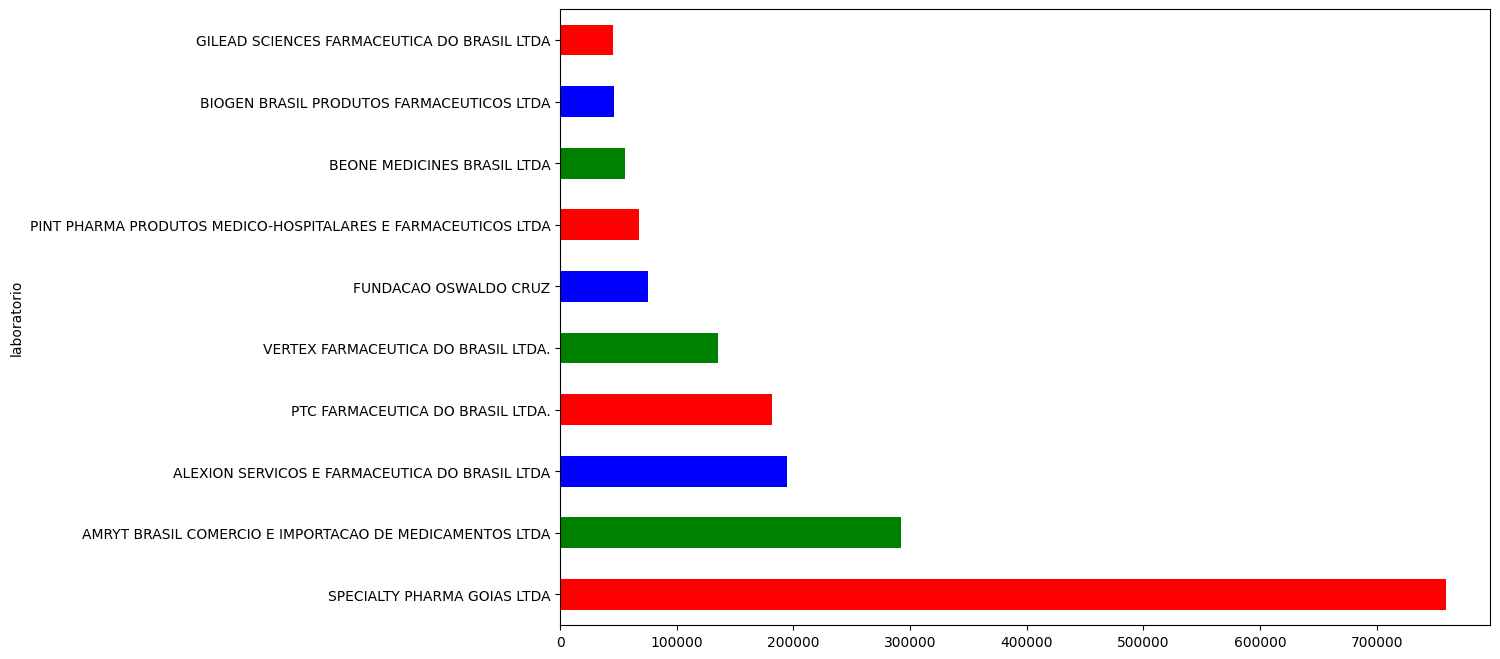

In [10]:
medicamentos.groupby(medicamentos['laboratorio'])\
    .preco_final_consumidor.mean()\
    .sort_values(ascending=False).head(10)\
    .plot(kind='barh', figsize=(12, 8), color=['r', 'g', 'b'])


<Axes: >

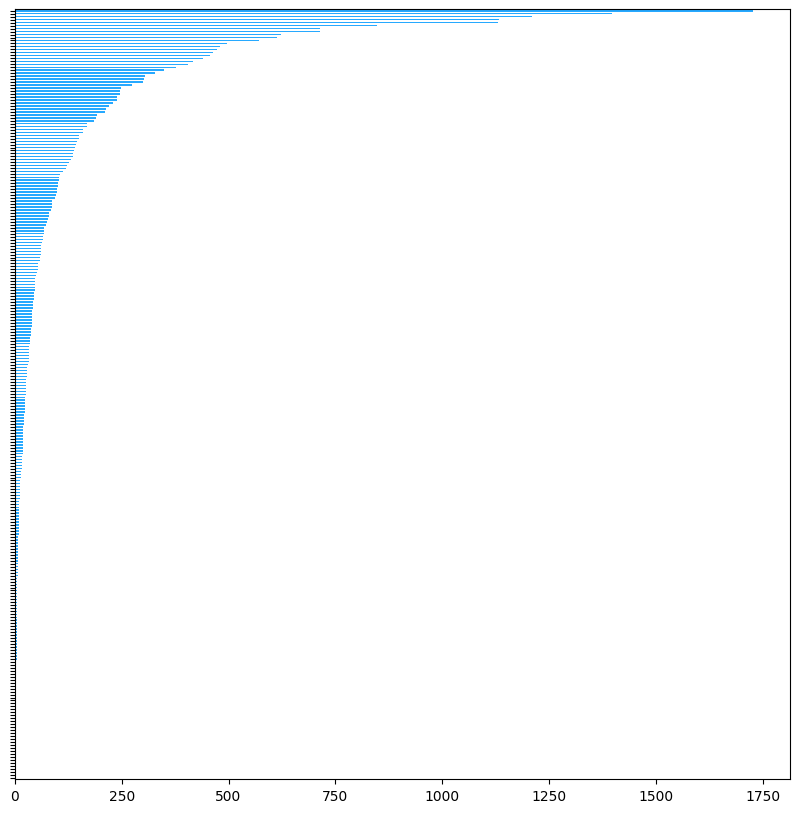

In [11]:
cotagem_lab = medicamentos['laboratorio'].value_counts().sort_values(ascending=True)

ax1 = cotagem_lab.plot(
    kind='barh',
    figsize=(10, 10),
    color='#27A9FF'
)
ax1.set_yticklabels([])
ax1.set_ylabel('')
ax1

In [12]:
termo_digitado = input("Qual o medicamento você quer buscar? ")
resultado = buscar_remedios(termo_digitado, medicamentos)

if resultado is not None and not resultado.empty:
    display(resultado)
else:
    print("Nenhum resultado para exibir.")

Encontrado por Nome do Produto: 'dipirona'


,ativo,CNPJ,laboratorio,registro,EAN 1,EAN 2,EAN 3,produto,apresentacao,classe_terapeutica,tipo_produto,regime_preco,restricao_hospitalar,comercializavel,tarja,preco_final_consumidor
3403,BUTILBROMETO DE ESCOPOLAMINA;DIPIRONA,57.507.378/0003-65,EMS S/A,1023504930014,7896004701028,-,-,BROMETO DE N-BUTIL ESCOPOLAMINA + DIPIRONA SO...,"6,67 MG/ML + 333,4 MG/ML SOL OR CT FR VD CGT ...",A3D - ASSOCIAÇÕES DE ANTIESPASMÓDICOS COM ANAL...,Genérico,Regulado,False,False,Sem Tarja,12.44
3409,BUTILBROMETO DE ESCOPOLAMINA;DIPIRONA,19.570.720/0001-10,HIPOLABOR FARMACEUTICA LTDA,1134301540019,7898470680371,-,-,DIPIRONA MONOIDRATADA + BUTILBROMETO DE ESCOPO...,"(333,4 + 6,67) MG/ML SOL OR CT FR PLAS OPC GOT...",A3D - ASSOCIAÇÕES DE ANTIESPASMÓDICOS COM ANAL...,Genérico,Liberado,False,False,Sem Tarja,42.90
3465,CAFEÍNA ANIDRA;DIPIRONA,05.161.069/0001-10,BRAINFARMA INDÚSTRIA QUÍMICA E FARMACÊUTICA S.A,1558404790037,7896714261522,-,-,DIPIRONA + CAFEÍNA,500 MG + 65 MG COM CT BL AL PLAS AMB X 100,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Genérico,Liberado,False,True,Sem Tarja,176.01
11449,DIPIRONA,04.099.395/0001-82,SANTISA LABORATÓRIO FARMACÊUTICO S/A,1018600360022,7898404221151,-,-,DIPIRONA,500 MG/ML SOL INJ CX 100 AMP VD AMB X 2 ML,N2B1 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Genérico,Regulado,False,True,Sem Tarja,428.14
11450,DIPIRONA,57.507.378/0003-65,EMS S/A,1023508000011,7896004715674,-,-,DIPIRONA SÓDICA,50 MG/ML SOL OR CT FR VD AMB X 100 ML + COP,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Genérico,Liberado,False,True,Sem Tarja,21.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11705,DIPIRONA MONOIDRATADA;BUTILBROMETO DE ESCOPOLA...,19.570.720/0001-10,HIPOLABOR FARMACEUTICA LTDA,1134301540027,7898470680388,-,-,DIPIRONA MONOIDRATADA + BUTILBROMETO DE ESCOPO...,"(333,4 + 6,67) MG/ML SOL OR CX 200 FR PLAS OPC...",A3D - ASSOCIAÇÕES DE ANTIESPASMÓDICOS COM ANAL...,Genérico,Liberado,False,True,Sem Tarja,NaN
11720,DIPIRONA MONOIDRATADA;CAFEÍNA ANIDRA,05.161.069/0001-10,BRAINFARMA INDÚSTRIA QUÍMICA E FARMACÊUTICA S.A,1558404790029,7896714261515,-,-,DIPIRONA + CAFEÍNA,500 MG + 65 MG COM CT BL AL PLAS AMB X 16,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Genérico,Liberado,False,True,Sem Tarja,28.12
11730,DIPIRONA MONOIDRATADA;CAFEÍNA ANIDRA;CITRATO D...,17.159.229/0001-76,LABORATORIO TEUTO BRASILEIRO S/A,1037007890111,7896112120391,-,-,DIPIRONA SODICA+CAFEINA ANIDRA+CITRATO DE ORFE...,(300 + 35 + 50) MG COM CT BL AL PLAS PVC/PVDC ...,M3B - RELAXANTE MUSCULAR DE AÇÃO CENTRAL,Genérico,Liberado,False,False,Sem Tarja,13.94
11769,DIPIRONA MONOIDRATADA;DIPIRONA,65.271.900/0001-19,NATIVITA IND. COM. LTDA.,1476100130012,7897848500440,-,-,DIPIRONA SÓDICA,500 MG/ML SOL OR CT FR PLAS OPC GOT X 10 ML,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Genérico,Liberado,False,True,Sem Tarja,8.93
